# **Assigment 2**

*Nombre:* Lilian Daniela Suárez Riveros

Importación de librerias necesarias para realizar el assigment 2.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 
import scipy
from pandas.plotting import parallel_coordinates

**1.** Cargar el data set suministrado breast-cancer-wisconsin.data

In [2]:
CancerData = pd.read_csv('C:/Users/Lilian/Downloads/BreastCancerDataSet.csv')

**2.** Realice una exploración rápida de los datos cargados indicando el tipo de cada variable, una corta descripción de cada una y presente la dimensión de los datos.

La dimensión del conjunto de datos indica que tenemos 30 variables cuantitativas, una variable dicotímica y el ID único que identifica a cada paciente.

In [3]:
CancerData.shape

(569, 33)

La descripción obtenida de la fuente de los datos orginal [Breast Cancer Wisconsin](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)):
1.   ID: Identificación único de cada paciente.
2.   diagnosis: Diagnostico del paciente. 357 casos benignos (B) y 212 casos malignos (M).

La media (mean), el error estándar (SE) y el "peor" o mayor (media de los tres valores más grandes) (worst) de  las siguientes características se calcularon para cada imagen para un total de 30.

3.   radius: Media de las distancias del centro a los puntos del perímetro.
4.   texture: Desviación estándar de los valores de la escala de grises.
5.   perimeter: Perímetro.
6.   area_mean: Área.
7.   smoothness: Variación local en longitudes de radio.
8.   compactness: perimeter^2 / area - 1.0
9.   concavity: Severidad de las porciones cóncavas del contorno.
10.  concave points: Número de porciones cóncavas del contorno.
11.  Symmetry
12.  Fractal dimension: "Aproximación a la línea de costa" - 1


Verificación de columnas.

In [4]:
CancerData.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

Se encontro la columna *'Unnamed: 32'* que no contiene ningún valor, por lo que se elimino.

In [5]:
CancerData = CancerData.drop(columns = ['Unnamed: 32'])

Descripción de las variables a través de un resumen.

In [6]:
CancerData.drop(columns = ['id']).describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


**3.** Valide si algunos de los atributos tienen valores faltantes. Indique los atributos con valor faltante y el porcentaje por cada atributo.

El conjunto de datos no tiene datos faltantes como se observa a continuación.

In [7]:
missing_values_count = CancerData.isnull().sum()
missing_values_count/CancerData.shape[0]*100

id                         0.0
diagnosis                  0.0
radius_mean                0.0
texture_mean               0.0
perimeter_mean             0.0
area_mean                  0.0
smoothness_mean            0.0
compactness_mean           0.0
concavity_mean             0.0
concave points_mean        0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                 0.0
perimeter_se               0.0
area_se                    0.0
smoothness_se              0.0
compactness_se             0.0
concavity_se               0.0
concave points_se          0.0
symmetry_se                0.0
fractal_dimension_se       0.0
radius_worst               0.0
texture_worst              0.0
perimeter_worst            0.0
area_worst                 0.0
smoothness_worst           0.0
compactness_worst          0.0
concavity_worst            0.0
concave points_worst       0.0
symmetry_worst             0.0
fractal_dimension_worst    0.0
dtype: f

**4.** Muestre la cantidad de pacientes por cada tipo de tumor (benign o malignant) junto con una representación gráfica.

El conjunto de datos es desbalanceado, ya que tiene diferente número de pacientes con diagnostico B y con diagnostico M.

In [8]:
Cantidad = CancerData.groupby(['diagnosis'], as_index = False).count().loc[:,['diagnosis','id']]
Cantidad.columns = ['diagnosis', 'amount']
Cantidad

,diagnosis,amount
0,B,357
1,M,212


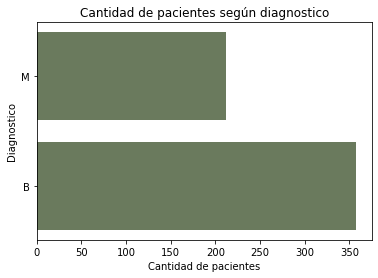

In [9]:
plt.barh(Cantidad.diagnosis,Cantidad.amount,color='#6A7A5D')
plt.ylabel('Diagnostico')
plt.xlabel('Cantidad de pacientes')
plt.title('Cantidad de pacientes según diagnostico')
plt.show()

**5.** Identifique relaciones/patrones encuentra entre los atributos y la posibilidad de tener cáncer, y visceer la posibilidad de no tenerlo.

Se realizó el test U de Mann-Whitney-Wilcoxon para comprobar si hay diferencia significativa en las variables entre si el diagnostico es B (Benigno) o M (Maligno).

[Fuente de código para test U de Mann-Whitney-Wilcoxon](https://www.cienciadedatos.net/documentos/pystats11-wilcoxon-mann-whitney-u-test-python)


**Test U de Mann-Whitney-Wilcoxon** 

H_0: No hay diferencia significativa entre los grupos

H_A: Hay diferencia significativa entre los grupos

Si p<0,5 se rechaza H_0.

*radius_mean*: Hay diferencia significativa de la variable entre los diagnosticos de aproximadamente 5.125

In [10]:
radius_mean_M = CancerData[CancerData.diagnosis == 'M'].loc[:,'radius_mean']
radius_mean_B = CancerData[CancerData.diagnosis == 'B'].loc[:, 'radius_mean']

In [11]:
scipy.stats.mannwhitneyu(x=radius_mean_M, y=radius_mean_B, alternative='two-sided')

MannwhitneyuResult(statistic=70955.0, pvalue=2.6929427727965647e-68)

In [12]:
radius_mean_M.median() - radius_mean_B.median() 

5.1250000000000036

*texture_mean*: Hay diferencia significativa de la variable entre los diagnosticos de aproximadamente 4.07

In [13]:
texture_mean_M = CancerData[CancerData.diagnosis == 'M'].loc[:,'texture_mean']
texture_mean_B = CancerData[CancerData.diagnosis == 'B'].loc[:,'texture_mean']

In [14]:
scipy.stats.mannwhitneyu(x=texture_mean_M, y = texture_mean_B, alternative='two-sided')

MannwhitneyuResult(statistic=58717.5, pvalue=3.428626504744227e-28)

In [15]:
texture_mean_M.median() - texture_mean_B.median() 

4.07

*perimeter_mean*: Hay diferencia significativa de la variable entre los diagnosticos de aproximadamente 36.01

In [16]:
perimeter_mean_M = CancerData[CancerData.diagnosis == 'M'].loc[:,'perimeter_mean']
perimeter_mean_B = CancerData[CancerData.diagnosis == 'B'].loc[:,'perimeter_mean']

In [17]:
scipy.stats.mannwhitneyu(x=perimeter_mean_M, y = perimeter_mean_B, alternative='two-sided')

MannwhitneyuResult(statistic=71665.0, pvalue=3.553870225963875e-71)

In [18]:
perimeter_mean_M.median() - perimeter_mean_B.median() 

36.019999999999996

*area_mean*: Hay diferencia significativa de la variable entre los diagnosticos de aproximadamente 473.6

In [19]:
area_mean_M = CancerData[CancerData.diagnosis == 'M'].loc[:,'area_mean']
area_mean_B = CancerData[CancerData.diagnosis == 'B'].loc[:,'area_mean']

In [20]:
scipy.stats.mannwhitneyu(x=area_mean_M, y = area_mean_B, alternative='two-sided')

MannwhitneyuResult(statistic=71015.5, pvalue=1.539780362858885e-68)

In [21]:
area_mean_M.median() - area_mean_B.median() 

473.6

smoothness_mean: Hay diferencia significativa de la variable entre los diagnosticos de aproximadamente 0.01144

In [22]:
smoothness_mean_M = CancerData[CancerData.diagnosis == 'M'].loc[:,'smoothness_mean']
smoothness_mean_B = CancerData[CancerData.diagnosis == 'B'].loc[:,'smoothness_mean']

In [23]:
scipy.stats.mannwhitneyu(x=smoothness_mean_M, y = smoothness_mean_B, alternative='two-sided')

MannwhitneyuResult(statistic=54647.0, pvalue=7.793006595586556e-19)

In [24]:
smoothness_mean_M.median() - smoothness_mean_B.median() 

0.011440000000000006

compactness_mean: Hay diferencia significativa de la variable entre los diagnosticos de aproximadamente 0.05706

In [25]:
compactness_mean_M = CancerData[CancerData.diagnosis == 'M'].loc[:,'compactness_mean']
compactness_mean_B = CancerData[CancerData.diagnosis == 'B'].loc[:,'compactness_mean']

In [26]:
scipy.stats.mannwhitneyu(x=compactness_mean_M, y = compactness_mean_B, alternative='two-sided')

MannwhitneyuResult(statistic=65374.5, pvalue=8.951992005223344e-48)

In [27]:
compactness_mean_M.median() - compactness_mean_B.median() 

0.05706

*concavity_mean*: Hay diferencia significativa de la variable entre los diagnosticos de aproximadamente 0.1142

In [28]:
concavity_mean_M = CancerData[CancerData.diagnosis == 'M'].loc[:,'concavity_mean']
concavity_mean_B = CancerData[CancerData.diagnosis == 'B'].loc[:,'concavity_mean']

In [29]:
scipy.stats.mannwhitneyu(x=concavity_mean_M, y = concavity_mean_B, alternative='two-sided')

MannwhitneyuResult(statistic=70978.5, pvalue=2.164548790621971e-68)

In [30]:
concavity_mean_M.median() - concavity_mean_B.median() 

0.11425999999999999

*concave points_mean*: Hay diferencia significativa de la variable entre los diagnosticos de aproximadamente 0.06284

In [31]:
concavepoints_mean_M = CancerData[CancerData.diagnosis == 'M'].loc[:,'concave points_mean']
concavepoints_mean_B = CancerData[CancerData.diagnosis == 'B'].loc[:,'concave points_mean']

In [32]:
scipy.stats.mannwhitneyu(x=concavepoints_mean_M, y = concavepoints_mean_B, alternative='two-sided')

MannwhitneyuResult(statistic=72992.5, pvalue=1.0063237037340002e-76)

In [33]:
concavepoints_mean_M.median() - concavepoints_mean_B.median() 

0.06284

*symmetry_mean*: Hay diferencia significativa de la variable entre los diagnosticos de aproximadamente 0.01850

In [34]:
symmetry_mean_M = CancerData[CancerData.diagnosis == 'M'].loc[:,'symmetry_mean']
symmetry_mean_B = CancerData[CancerData.diagnosis == 'B'].loc[:,'symmetry_mean']

In [35]:
scipy.stats.mannwhitneyu(x=symmetry_mean_M, y = symmetry_mean_B, alternative='two-sided')

MannwhitneyuResult(statistic=52870.0, pvalue=2.2680501067477204e-15)

In [36]:
symmetry_mean_M.median() - symmetry_mean_B.median() 

0.018500000000000016

*fractal_dimension_mean*: No hay diferencia significativa de la variable entre los diagnosticos.

In [37]:
fractal_dimension_mean_M = CancerData[CancerData.diagnosis == 'M'].loc[:,'fractal_dimension_mean']
fractal_dimension_mean_B = CancerData[CancerData.diagnosis == 'B'].loc[:,'fractal_dimension_mean']

In [38]:
scipy.stats.mannwhitneyu(x=fractal_dimension_mean_M, y = fractal_dimension_mean_B, alternative='two-sided')

MannwhitneyuResult(statistic=36671.5, pvalue=0.5371856021356239)

Al realizar un gráfico de coordenadas paralelas, se nota que las coordenadas que tiene el promedio de las caracteristicas estudiadas tienen a ser más grandes para el diagnóstico maligno que el benigno.

In [39]:
CancerDataNum = CancerData[CancerData.columns[CancerData.columns.str.endswith('mean')].union(pd.Index(['diagnosis']))]
CancerDataNum.shape

(569, 11)

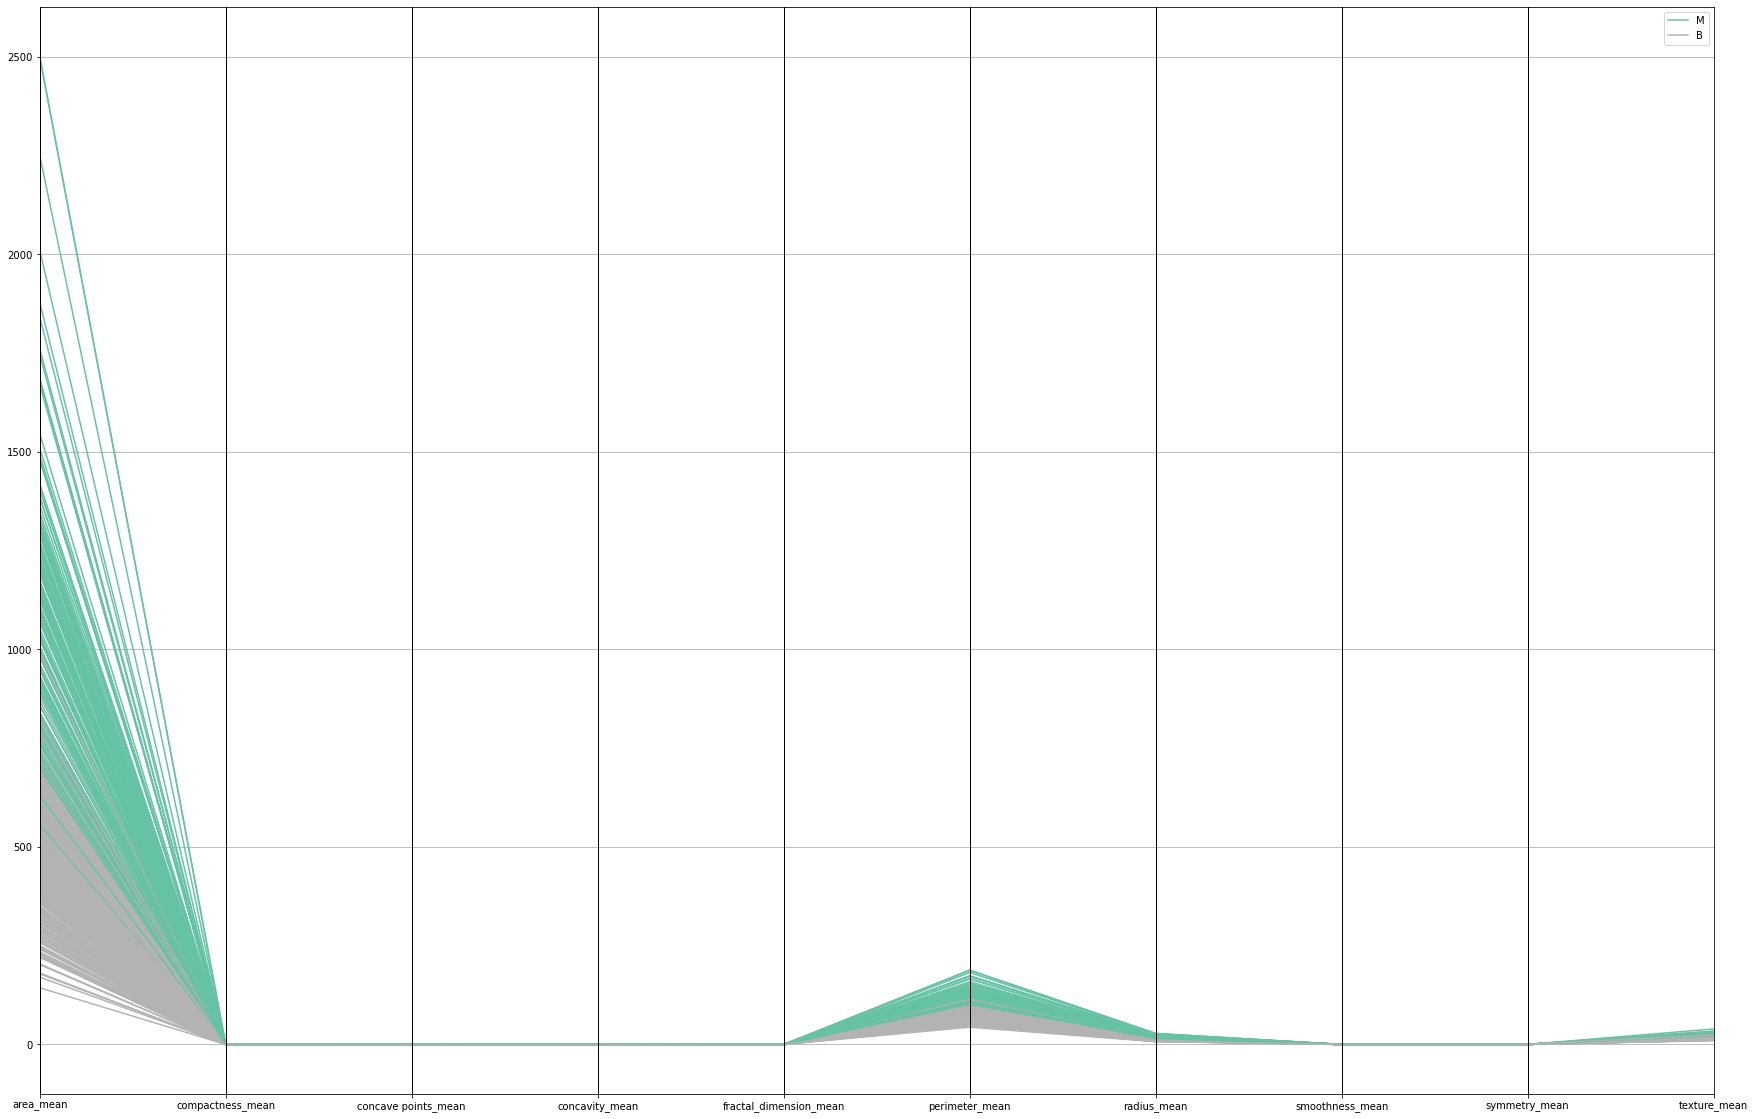

In [48]:
parallel_coordinates(CancerDataNum,'diagnosis', colormap=plt.get_cmap("Set2"))
plt.show()

In [41]:
CancerDataWorst = CancerData[CancerData.columns[CancerData.columns.str.endswith('worst')].union(pd.Index(['diagnosis']))]
CancerDataWorst.shape

(569, 11)

In [42]:
CancerDataWorst.groupby('diagnosis').mean()

,area_worst,compactness_worst,concave points_worst,concavity_worst,fractal_dimension_worst,perimeter_worst,radius_worst,smoothness_worst,symmetry_worst,texture_worst
diagnosis,,,,,,,,,,
B,558.899440,0.182673,0.074444,0.166238,0.079442,87.005938,13.379801,0.124959,0.270246,23.515070
M,1422.286321,0.374824,0.182237,0.450606,0.091530,141.370330,21.134811,0.144845,0.323468,29.318208


**6.** Cuáles son los atributos más relevantes con la enfermedad del cáncer de mama.

De acuerdo al gráfico de coordenadas paralelas, el área, el radio y el perimetro promedio tienden a ser mucho más grandes para el tejido maligno que el benigno. Esto podría indicar que los atributos antes mencionados pueden ayudar a detectar un posible caso de cáncer de mama.

Por medio del test estádistico U de Mann-Whitney-Wilcoxon, se logra concluir que todas las medias de los atributos tienen diferencia estadísticamente significativa entre tener un diagnostico benigno o maligno. A excepción del atributo fractal_dimension que no parece tener relevancia en la detección, ya que no es diferente estadísticamente entre las categorias del diagnostico.

Incluso si tomamos la media de las variables worst, tiende a ser más grande el diagnostico M que el B.



**7.** Realice gráfico de dispersión entre cada par de atributos con la intención de conocer la relación entre ellas y la posibilidad de tener cáncer o no.

<Figure size 792x792 with 0 Axes>

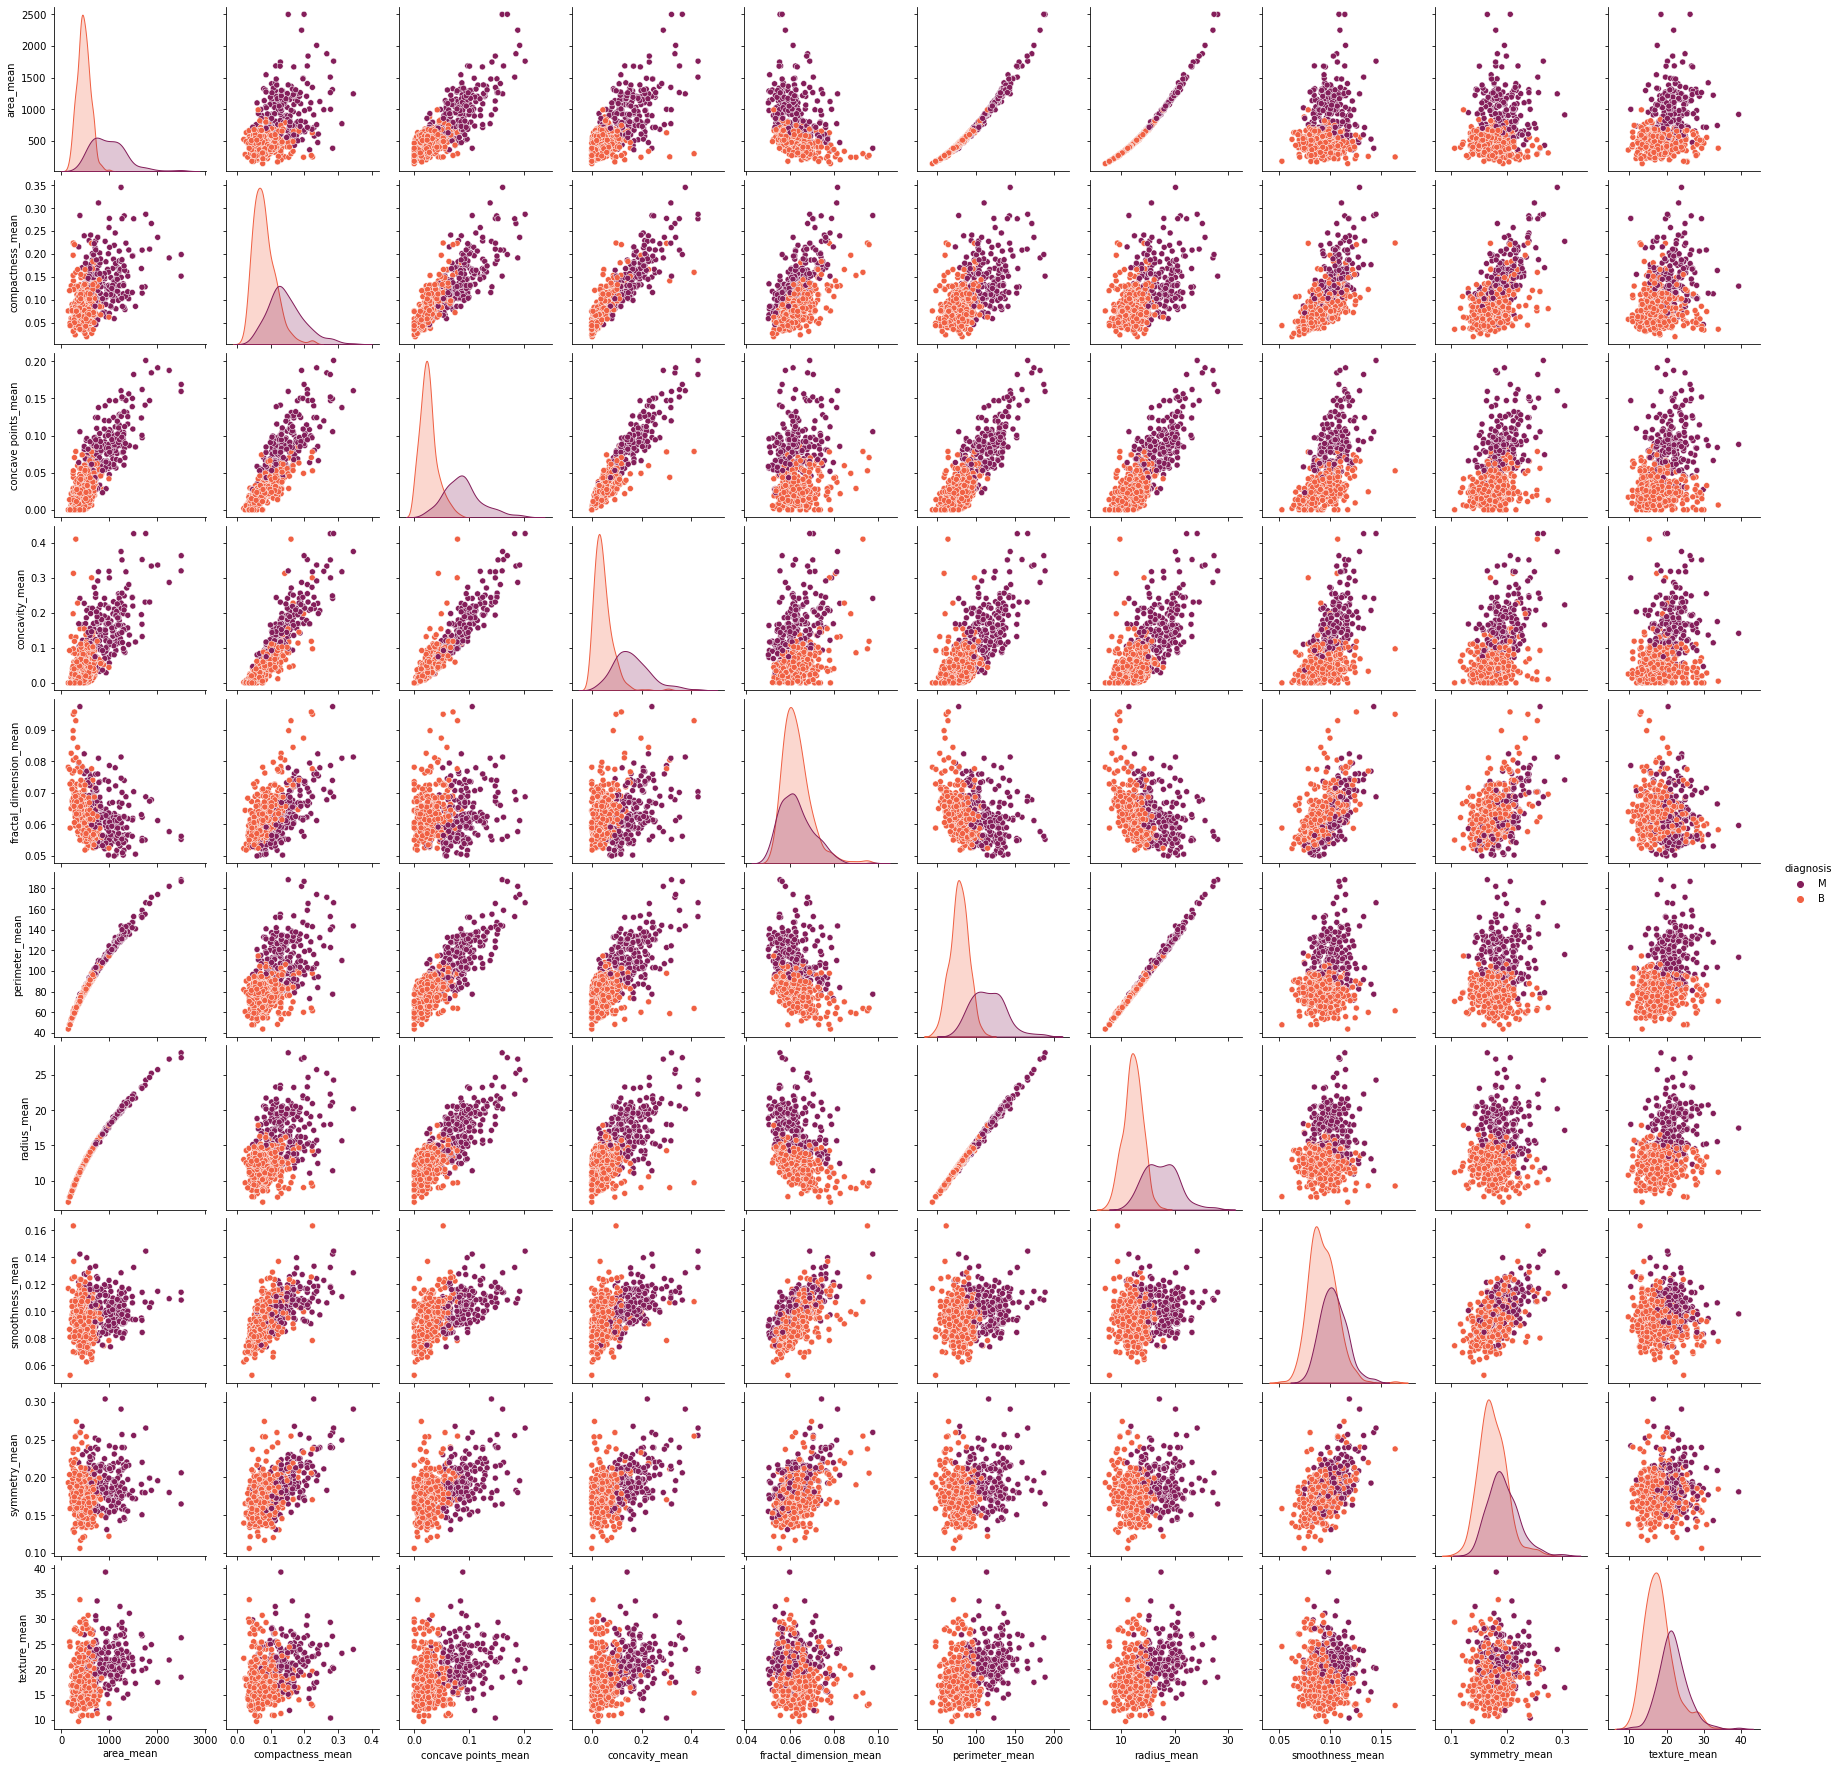

In [43]:
plt.figure(figsize = (11,11))
sns.pairplot(CancerDataNum, hue = 'diagnosis',palette = 'rocket')
plt.show()

In [44]:
new = pd.concat([CancerDataNum, pd.get_dummies(CancerData["diagnosis"],drop_first = True)],axis = 1)

<AxesSubplot:>

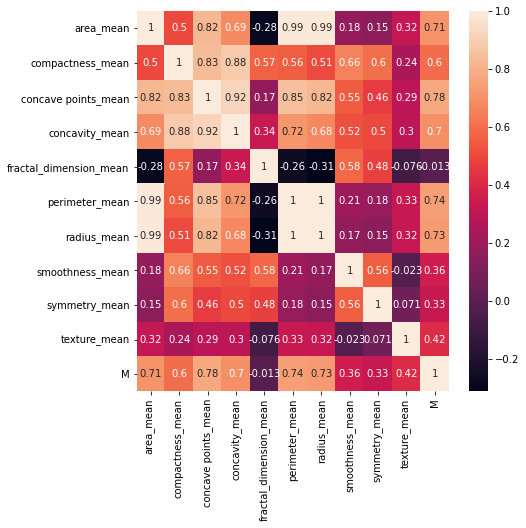

In [45]:
plt.figure(figsize = (7,7))
sns.heatmap(new.drop(columns = ['diagnosis']).corr(),annot = True)

*   Las variables area_mean y perimeter_mean presentan colinealidad alta positiva.
*   Las variables area_mean y radius_mean presentan colinealidad alta positiva.
*   Las variables perimeter_mean y radius_mean presentan colinealidad alta positiva.
*   Existe una clara separación entre algunas atributos entre los pacientes benignos y malignos.
* En casi todas los atributos terminados por mean son más dispersos los valores con diagnostico M (Maligno) que con B (Benigno) según las gráficas de densidad.
* Las variables que parecen ser importantes para el diagnostico son area_mean, perimeter_mean y radius_mean, concave points_mean, concavity_means y radious_mean.
* En este caso, también es claro que los valores de area_mean, perimeter_mean y radius_mean tienen a ser más grandes en un diagnostico maligno que benigno.